<a href="https://colab.research.google.com/github/ithukral/DS440/blob/main/TimeSeriesandEvidently.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:

from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/Colab Notebooks'
!pwd #Prints the present working directory

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('sto.csv')
#
df= df.replace(',','', regex=True)

df["Open"] = df.Open.astype(float)
df["High"] = df.High.astype(float)
df["Low"] = df.Low.astype(float)
df["Close*"] = df["Close*"].astype(float)
df["Adj Close**"] = df["Adj Close**"].astype(float)
df["Volume"] = df.Volume.astype(float)
df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume         float64
dtype: object

In [ ]:
df = df.iloc[::-1]

In [ ]:
df=df.reset_index(drop=True)


In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

          Date    Open    High     Low  Close*  Adj Close**        Volume
0  Nov 10 1997  927.51  935.90  900.61  928.35       928.35  2.774860e+09
1  Nov 17 1997  928.35  964.55  928.35  963.09       963.09  2.854250e+09
2  Nov 24 1997  963.09  963.09  944.71  955.40       955.40  1.779630e+09
3  Dec 01 1997  955.40  986.25  955.40  983.79       983.79  2.988090e+09
4  Dec 08 1997  983.79  985.67  947.00  953.39       953.39  2.842790e+09
(1300, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


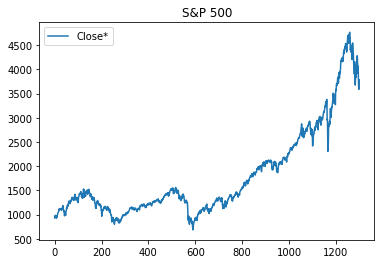

In [ ]:
df[['Close*']].plot()
plt.title("S&P 500")
plt.show()

Text(0.5, 1.0, 'S&P 500 Cumulative Returns')

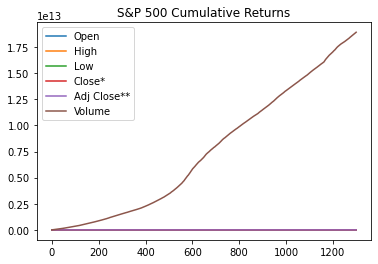

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('S&P 500 Cumulative Returns')

In [ ]:
df['Date']

0       Nov 10 1997
1       Nov 17 1997
2       Nov 24 1997
3       Dec 01 1997
4       Dec 08 1997
           ...     
1295    Sep 05 2022
1296    Sep 12 2022
1297    Sep 19 2022
1298    Sep 26 2022
1299    Oct 03 2022
Name: Date, Length: 1300, dtype: object

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
#  Build Model 
model = ARIMA(history, order=(5,2,5))  
fitted = model.fit()  




# Forecast using 90% confidence interval
predictions, se, conf = fitted.forecast(260, alpha=0.1) 
fc_series = pd.Series(predictions, index=test_data.index)
#for t in range(len(test_ar)):
#    model = ARIMA(history, order=(1,1,2))
#    model_fit = model.fit()
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = test_ar[t]
#    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

#We only need to make model once, the commented out approach creates model per single prediction. 
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 309087.519
Symmetric mean absolute percentage error: 10.897


In [ ]:
print(predictions[160])
print(test_data['Open'][1200])
print(test_data.index)

3160.1883864567826
3583.04
RangeIndex(start=1040, stop=1300, step=1)


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [ ]:
print(train_data)

             Date     Open     High      Low   Close*  Adj Close**  \
0     Nov 10 1997   927.51   935.90   900.61   928.35       928.35   
1     Nov 17 1997   928.35   964.55   928.35   963.09       963.09   
2     Nov 24 1997   963.09   963.09   944.71   955.40       955.40   
3     Dec 01 1997   955.40   986.25   955.40   983.79       983.79   
4     Dec 08 1997   983.79   985.67   947.00   953.39       953.39   
...           ...      ...      ...      ...      ...          ...   
1035  Sep 11 2017  2474.52  2500.23  2474.52  2500.23      2500.23   
1036  Sep 18 2017  2502.51  2508.85  2496.54  2502.22      2502.22   
1037  Sep 25 2017  2499.39  2519.44  2488.03  2519.36      2519.36   
1038  Oct 02 2017  2521.20  2552.51  2520.40  2549.33      2549.33   
1039  Oct 09 2017  2551.39  2557.65  2541.60  2553.17      2553.17   

            Volume  
0     2.774860e+09  
1     2.854250e+09  
2     1.779630e+09  
3     2.988090e+09  
4     2.842790e+09  
...            ...  
1035  1.8158

In [ ]:
print(test_data)

             Date     Open     High      Low   Close*  Adj Close**  \
1040  Oct 16 2017  2555.57  2575.44  2547.92  2575.21      2575.21   
1041  Oct 23 2017  2578.08  2582.98  2544.00  2581.07      2581.07   
1042  Oct 30 2017  2577.75  2588.42  2566.17  2587.84      2587.84   
1043  Nov 06 2017  2587.47  2597.02  2566.33  2582.30      2582.30   
1044  Nov 13 2017  2576.53  2590.09  2557.45  2578.85      2578.85   
...           ...      ...      ...      ...      ...          ...   
1295  Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
1296  Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
1297  Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
1298  Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
1299  Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   

            Volume  
1040  1.517886e+10  
1041  1.826971e+10  
1042  1.891526e+10  
1043  1.856661e+10  
1044  1.721645e+10  
...            ...  
1295  1.5886

In [ ]:
print(df)

             Date     Open     High      Low   Close*  Adj Close**  \
0     Nov 10 1997   927.51   935.90   900.61   928.35       928.35   
1     Nov 17 1997   928.35   964.55   928.35   963.09       963.09   
2     Nov 24 1997   963.09   963.09   944.71   955.40       955.40   
3     Dec 01 1997   955.40   986.25   955.40   983.79       983.79   
4     Dec 08 1997   983.79   985.67   947.00   953.39       953.39   
...           ...      ...      ...      ...      ...          ...   
1295  Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
1296  Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
1297  Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
1298  Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
1299  Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   

            Volume  
0     2.774860e+09  
1     2.854250e+09  
2     1.779630e+09  
3     2.988090e+09  
4     2.842790e+09  
...            ...  
1295  1.5886

In [ ]:
x= test_ar

print(x)

[2555.57 2578.08 2577.75 2587.47 2576.53 2579.49 2602.66 2657.19 2652.19
 2685.92 2679.09 2683.73 2742.67 2798.96 2809.16 2867.23 2741.06 2636.75
 2722.99 2757.37 2681.06 2790.54 2741.38 2619.35 2633.45 2617.18 2670.1
 2675.4  2682.51 2680.34 2738.47 2735.39 2705.11 2741.67 2780.18 2765.79
 2742.94 2704.95 2775.62 2797.36 2799.17 2819.   2840.29 2835.46 2853.93
 2884.69 2896.96 2881.39 2903.83 2921.83 2926.29 2877.53 2763.83 2773.94
 2682.65 2726.37 2773.93 2730.74 2649.97 2790.5  2630.86 2590.75 2400.56
 2498.94 2535.61 2580.31 2657.88 2644.97 2706.49 2712.4  2769.28 2804.35
 2814.37 2747.61 2822.61 2796.01 2848.63 2888.46 2908.32 2898.78 2940.58
 2908.89 2840.19 2841.94 2830.03 2751.53 2885.83 2889.75 2951.42 2971.41
 2979.77 3017.8  2981.93 3024.47 2898.07 2907.07 2913.48 2866.7  2909.01
 2988.43 2996.41 2983.5  2967.07 2944.23 2965.81 2996.48 3032.12 3078.96
 3080.33 3117.91 3117.44 3143.85 3141.86 3183.63 3226.05 3240.09 3217.55
 3271.13 3321.03 3247.16 3235.66 3318.28 3369.04 325

In [ ]:
predictions

array([2549.94581901, 2556.2107979 , 2559.89014912, 2559.91226733,
       2567.06263447, 2569.75964896, 2571.35760781, 2577.22357454,
       2579.90913143, 2582.7609137 , 2587.24430884, 2590.57017306,
       2593.61882387, 2597.69497407, 2601.16873913, 2604.41986443,
       2608.27254207, 2611.80051399, 2615.19898972, 2618.91899936,
       2622.48612559, 2625.96716942, 2629.62591701, 2633.21350106,
       2636.74696126, 2640.37958195, 2643.98012478, 2647.54901314,
       2651.1731613 , 2654.7846532 , 2658.37851637, 2662.00380373,
       2665.62566993, 2669.23856168, 2672.87001415, 2676.50228231,
       2680.13085073, 2683.77104861, 2687.41394768, 2691.05629391,
       2694.70656378, 2698.36032543, 2702.01538539, 2705.67640192,
       2709.34120894, 2713.00839141, 2716.68049303, 2720.35647563,
       2724.03545392, 2727.71880826, 2731.40605345, 2735.09664822,
       2738.79133696, 2742.48990054, 2746.19201397, 2749.89807613,
       2753.60799286, 2757.3215719 , 2761.03902562, 2764.76031

In [ ]:
reference_test=test_data
reference_test

Date     Open     High      Low   Close*  Adj Close**  \
1040  Oct 16 2017  2555.57  2575.44  2547.92  2575.21      2575.21   
1041  Oct 23 2017  2578.08  2582.98  2544.00  2581.07      2581.07   
1042  Oct 30 2017  2577.75  2588.42  2566.17  2587.84      2587.84   
1043  Nov 06 2017  2587.47  2597.02  2566.33  2582.30      2582.30   
1044  Nov 13 2017  2576.53  2590.09  2557.45  2578.85      2578.85   
...           ...      ...      ...      ...      ...          ...   
1295  Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
1296  Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
1297  Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
1298  Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
1299  Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   

            Volume  
1040  1.517886e+10  
1041  1.826971e+10  
1042  1.891526e+10  
1043  1.856661e+10  
1044  1.721645e+10  
...            ...  
1295  1.588645e+10  
1296  2.472847e+10  
1297  2.133210e+10  
1298  2.447590e+10  
1299  1.424644e+10  

[260 rows x 7 columns]

In [ ]:
reference_test=reference_test.drop('Adj Close**', axis=1)

In [ ]:
reference_test['Close*']=predictions

In [ ]:
reference_test['Adj Close**']=predictions

In [ ]:
reference_test

Date     Open     High      Low       Close*        Volume  \
1040  Oct 16 2017  2555.57  2575.44  2547.92  2549.945819  1.517886e+10   
1041  Oct 23 2017  2578.08  2582.98  2544.00  2556.210798  1.826971e+10   
1042  Oct 30 2017  2577.75  2588.42  2566.17  2559.890149  1.891526e+10   
1043  Nov 06 2017  2587.47  2597.02  2566.33  2559.912267  1.856661e+10   
1044  Nov 13 2017  2576.53  2590.09  2557.45  2567.062634  1.721645e+10   
...           ...      ...      ...      ...          ...           ...   
1295  Sep 05 2022  3930.89  4076.81  3886.75  3567.518244  1.588645e+10   
1296  Sep 12 2022  4083.67  4119.28  3837.08  3571.988402  2.472847e+10   
1297  Sep 19 2022  3849.91  3907.07  3647.47  3576.462361  2.133210e+10   
1298  Sep 26 2022  3682.72  3736.74  3584.13  3580.940122  2.447590e+10   
1299  Oct 03 2022  3609.78  3806.91  3604.93  3585.421684  1.424644e+10   

      Adj Close**  
1040  2549.945819  
1041  2556.210798  
1042  2559.890149  
1043  2559.912267  
1044  2567.062634  
...           ...  
1295  3567.518244  
1296  3571.988402  
1297  3576.462361  
1298  3580.940122  
1299  3585.421684  

[260 rows x 7 columns]

In [ ]:
!pip install -U scikit-multiflow
!pip install evidently

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.1 MB 6.2 MB/s 
     |████████████████████████████████| 636 kB 64.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab

/usr/local/lib/python3.7/dist-packages/evidently/analyzers/__init__.py:3: UserWarning: analyzers are deprecated, use metrics instead
  warnings.warn("analyzers are deprecated, use metrics instead")
/usr/local/lib/python3.7/dist-packages/evidently/dashboard/__init__.py:8: UserWarning: dashboards are deprecated, use metrics instead
  warnings.warn("dashboards are deprecated, use metrics instead")


In [ ]:

from skmultiflow.drift_detection.adwin import ADWIN
import numpy as np
import pandas as pd
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
#from evidently.dashboard.tabs import DataDriftTab, CatTargetDriftTab

/usr/local/lib/python3.7/dist-packages/evidently/tabs/__init__.py:9: UserWarning: 'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'
  "'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'"


In [ ]:
verbose= False
old_dataset=df
new_data=train_data
new_data=new_data.append(reference_test)



In [ ]:
stocks_data_drift_report = Dashboard(tabs=[DataDriftTab(verbose_level=verbose)])
stocks_data_drift_report.calculate(reference_test, test_data)
stocks_data_drift_report.show()

In [ ]:
old_dataset

Date     Open     High      Low   Close*  Adj Close**  \
0     Nov 10 1997   927.51   935.90   900.61   928.35       928.35   
1     Nov 17 1997   928.35   964.55   928.35   963.09       963.09   
2     Nov 24 1997   963.09   963.09   944.71   955.40       955.40   
3     Dec 01 1997   955.40   986.25   955.40   983.79       983.79   
4     Dec 08 1997   983.79   985.67   947.00   953.39       953.39   
...           ...      ...      ...      ...      ...          ...   
1295  Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
1296  Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
1297  Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
1298  Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
1299  Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   

            Volume  
0     2.774860e+09  
1     2.854250e+09  
2     1.779630e+09  
3     2.988090e+09  
4     2.842790e+09  
...            ...  
1295  1.588645e+10  
1296  2.472847e+10  
1297  2.133210e+10  
1298  2.447590e+10  
1299  1.424644e+10  

[1300 rows x 7 columns]

In [ ]:
new_data

Date     Open     High      Low       Close*  Adj Close**  \
0     Nov 10 1997   927.51   935.90   900.61   928.350000   928.350000   
1     Nov 17 1997   928.35   964.55   928.35   963.090000   963.090000   
2     Nov 24 1997   963.09   963.09   944.71   955.400000   955.400000   
3     Dec 01 1997   955.40   986.25   955.40   983.790000   983.790000   
4     Dec 08 1997   983.79   985.67   947.00   953.390000   953.390000   
...           ...      ...      ...      ...          ...          ...   
1295  Sep 05 2022  3930.89  4076.81  3886.75  3567.518244  3567.518244   
1296  Sep 12 2022  4083.67  4119.28  3837.08  3571.988402  3571.988402   
1297  Sep 19 2022  3849.91  3907.07  3647.47  3576.462361  3576.462361   
1298  Sep 26 2022  3682.72  3736.74  3584.13  3580.940122  3580.940122   
1299  Oct 03 2022  3609.78  3806.91  3604.93  3585.421684  3585.421684   

            Volume  
0     2.774860e+09  
1     2.854250e+09  
2     1.779630e+09  
3     2.988090e+09  
4     2.842790e+09  
...            ...  
1295  1.588645e+10  
1296  2.472847e+10  
1297  2.133210e+10  
1298  2.447590e+10  
1299  1.424644e+10  

[1300 rows x 7 columns]